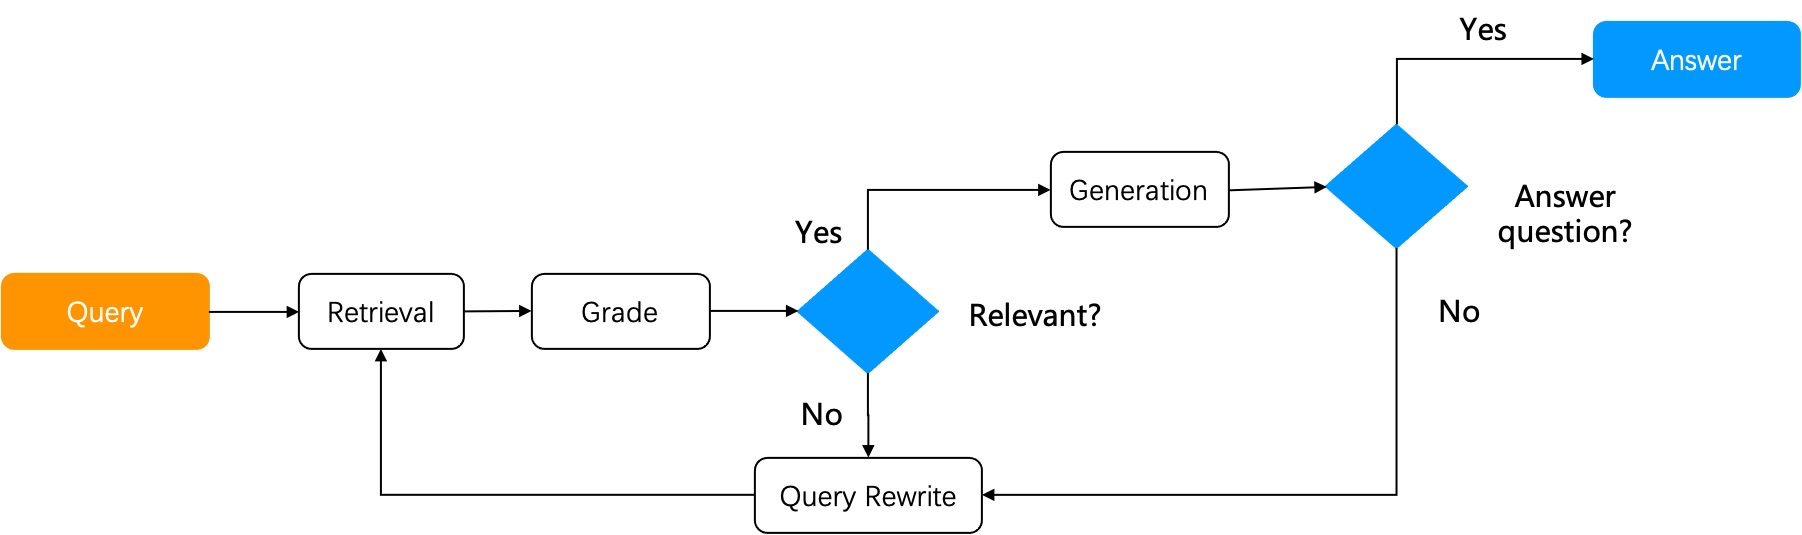

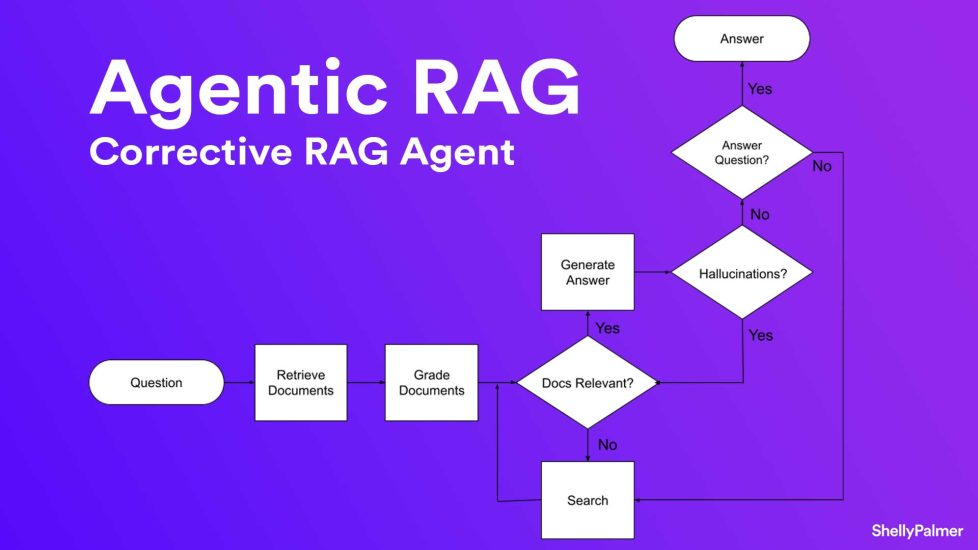

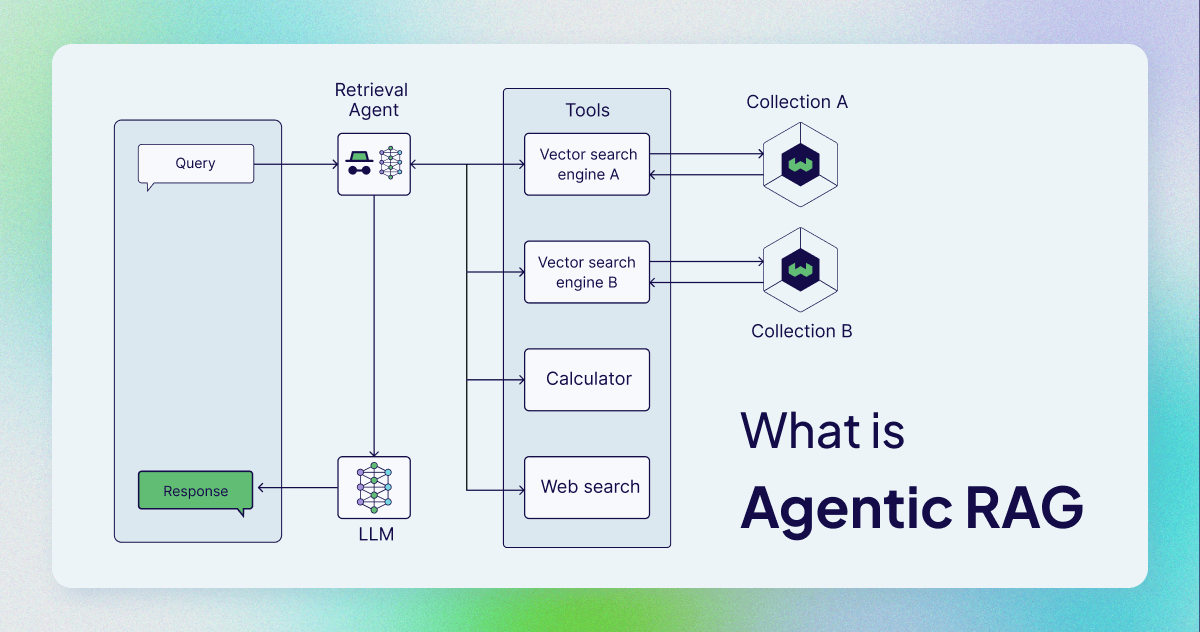

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from typing import Annotated, Literal, Sequence, TypedDict
from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langgraph.graph.message import add_messages
from langgraph.prebuilt import tools_condition
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.tools.retriever import create_retriever_tool
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode

d:\a27_YEARS_OLD\langgraph\venv\Lib\site-packages\IPython\core\interactiveshell.py:3577: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)
USER_AGENT environment variable not set, consider setting it to identify your requests.


In [4]:
import os
from dotenv import load_dotenv
load_dotenv()
GOOGLE_API_KEY=os.getenv("GEMINI_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"]= GROQ_API_KEY
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [5]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [6]:
llm.invoke("hello how are you?")

AIMessage(content="As an AI, I don't have feelings, but I'm here and ready to assist you! How can I help you today? 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 14, 'total_tokens': 47, 'completion_time': 0.06, 'prompt_time': 0.000218199, 'queue_time': 0.043199781, 'total_time': 0.060218199}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-d9c66730-0802-4732-9efe-db292be8e9e8-0', usage_metadata={'input_tokens': 14, 'output_tokens': 33, 'total_tokens': 47})

In [7]:
url= "https://lilianweng.github.io/posts/2023-06-23-agent/"

In [8]:
WebBaseLoader(url).load()

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [9]:
WebBaseLoader(url).load()[0].metadata["description"]

'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model 

In [10]:
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
]

In [11]:
docs = [WebBaseLoader(url).load() for url in urls]

In [12]:
docs

[[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final res

In [ ]:
docs_list=[item for sublist in docs for item in sublist] # nested for loop

In [14]:
docs_list

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [15]:
text_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100, chunk_overlap=25)

In [16]:
text_splitter

In [17]:
doc_splits=text_splitter.split_documents(docs_list)

In [18]:
doc_splits

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

rough workflows

In [ ]:
# app.invoke({"messages":["What is a Autonomous Agent?"]}) # messages   store as state at agentstate() dictionary as basemessage  sequencially
# state = AgentState(messages=[message1, message2]) # store two messages questions and responses
# app=workflow.compile()
#    # node 
#    ai_assistance(state)
#     messages = state['messages']
#     if len(messages)>1 # two messages present question and response
#         last_message = messages[-1] # last message or response
#         question = last_message.content 
#         chain = prompt | llm
#         response=chain.invoke({"question": question}) #  return and store final response  in agent state and end 
        
#     else call retriever tool # with first question messages[0]
#         retriever=vectorstore.as_retriever() > create retriver tools > tools=[retriever_tool] > toolnode > llm_with_tool =llm.bind_tools(tools) # (combine retriever and llm)
#         response  = llm_with_tool.invoke(messages) # retrive context and pass to 
#         # store response  in agent state go to grade document
        
#     grade_documents(state:AgentState)->Literal["Output_Generator", "Query_Rewriter"]
#         messages = state["messages"]
#         last_message = messages[-1] # that is retrieval tool response
#         question = messages[0].content # this is the question
#         docs = last_message.content
#         scored_result = chain.invoke({"question": question, "context": docs})
#         score = scored_result.binary_score
#         return yes or no for relevant documents  # class grade(BaseModel):
#                                                         # binary_score:str=Field(description="Relevance score 'yes' or 'no'")
        
#         if score == "yes": # return go to generate()
#         print("---DECISION: DOCS RELEVANT---")
#         return "generator" #this should be a node name
#         else:  # return go to rewrite()
#         print("---DECISION: DOCS NOT RELEVANT---")
#         return "rewriter" #this should be a node name
    
#     generate(state:AgentState): # doc is the message[-1] response
#         response = rag_chain.invoke({"context": docs, "question": question})
#         print(f"this is my response:{response}") end final response
        
#     rewrite(state:AgentState):
#         messages = state["messages"]
#         question = messages[0].content # question
#         response = llm.invoke(message)
#         return {"messages": [response]} # after query rephrase, go to ai_agent()

In [20]:
vectorstore=Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-chrome",
    embedding=embeddings
)

In [21]:
vectorstore

In [22]:
retriever=vectorstore.as_retriever()

In [23]:
retriever

VectorStoreRetriever(tags=['Chroma', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x0000028F750DE750>, search_kwargs={})

In [24]:
retriever_tool=create_retriever_tool(
    retriever,
    "retrieve_blog_posts",
    "Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.",
    )

In [26]:
retriever_tool

Tool(name='retrieve_blog_posts', description="Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.", args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x0000028F46C7AA20>, retriever=VectorStoreRetriever(tags=['Chroma', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x0000028F750DE750>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<funct

In [25]:
tools=[retriever_tool]

In [27]:
retrieve=ToolNode([retriever_tool])

In [29]:
retrieve

tools(tags=None, recurse=True, func_accepts_config=True, func_accepts={'writer': False, 'store': True}, tools_by_name={'retrieve_blog_posts': Tool(name='retrieve_blog_posts', description="Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.", args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x0000028F46C7AA20>, retriever=VectorStoreRetriever(tags=['Chroma', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x0000028F750DE750>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={

In [ ]:
# Code Breakdown:

# class AgentState(TypedDict):
#     messages: Annotated[Sequence[BaseMessage], add_messages]
# This code defines a class AgentState that is a TypedDict, which is a special kind of dictionary with fixed keys and value types, used to provide better type safety and autocompletion in Python.

# Here’s a breakdown of each part:

# 1. AgentState(TypedDict)
# TypedDict: This is a special class provided by typing that allows you to define dictionaries where each key has a fixed type. The dictionary keys are usually predefined, and each key must have a specified type.

# AgentState here is a subclass of TypedDict, meaning AgentState will represent a dictionary where the types of its values are enforced.

# Example:

# agent_state = AgentState(messages=["Message 1", "Message 2"])  # This would be valid.

# 2. messages: Annotated[Sequence[BaseMessage], add_messages]
# messages: This is a key in the AgentState dictionary. It holds a sequence (like a list or tuple) of BaseMessage objects.

# Annotated[...]: Annotated is used to attach additional metadata or annotations to the type. It’s a way to add extra information to the type system without affecting the actual type. In this case, it provides metadata for the messages field.

# The Annotated wrapper allows you to define a type and also include additional information that might be used by tools like static analyzers or for other purposes like validation.
# Sequence[BaseMessage]: This indicates that messages should be a sequence (e.g., a list or tuple) of BaseMessage objects.

# BaseMessage is likely a class that represents a message in the context of your program. It could have fields like content, sender, timestamp, etc.
# add_messages: This is a special annotation (or metadata) that likely refers to some function or constant that’s being added as additional context. The specific role of add_messages will depend on how it's defined elsewhere in the codebase.

# add_messages could be a function, validator, or modifier that helps manage or process the messages in some way, but it's not directly modifying the type of messages. It's simply metadata for the type checker or other parts of the system.

# For example, if add_messages were a function, it could be used in a custom decorator, validation system, or simply as an indication of how to handle messages.

# Putting It All Together:
# AgentState is a dictionary where one of the keys, messages, is specifically typed to be a sequence of BaseMessage objects. The sequence is annotated with add_messages, which provides additional metadata but doesn’t affect the type directly.

# Example of AgentState usage:


In [ ]:
from typing import TypedDict, Sequence
from typing_extensions import Annotated

class BaseMessage:
    def __init__(self, content: str):
        self.content = content

# Defining the `AgentState` TypedDict
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], "add_messages"]

# Example usage
message1 = BaseMessage("Hello, world!")
message2 = BaseMessage("How are you?")
state = AgentState(messages=[message1, message2]) # store two state question(message1) response(message2)

print(state)

{'messages': [<__main__.BaseMessage object at 0x0000028F5D34FC90>, <__main__.BaseMessage object at 0x0000028F5D3C8E10>]}


In [ ]:
# In the above code:

# AgentState is a dictionary with a messages field that is a sequence of BaseMessage objects.
# add_messages is metadata associated with the messages field, which can help guide the usage or interpretation of the data.
# Summary:
# AgentState is a dictionary where the messages key holds a sequence of BaseMessage objects.
# Annotated[Sequence[BaseMessage], add_messages] means that messages is a sequence of BaseMessage objects with additional metadata (add_messages).
# The annotation add_messages provides extra context or metadata that doesn't alter the type directly but can be used for purposes like validation or other system-specific behavior.

In [31]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [ ]:
def ai_assistant(state:AgentState): # agent
    print("---CALL AGENT---")
    messages = state['messages']
    
    if len(messages)>1: # response messages present  ready to final response
    # If there are two messages, the function extracts the last message(response) and its content .
        last_message = messages[-1]
        question = last_message.content
        prompt=PromptTemplate(
        template="""You are a helpful assistant whatever question has been asked to find out that in the given question and answer.
                        Here is the question:{question}
                        """,
                        input_variables=["question"]
                        )
            
        chain = prompt | llm
    
        response=chain.invoke({"question": question}) 
        return {"messages": [response]} # end 
    else: # only user message present
        llm_with_tool = llm.bind_tools(tools)
        response = llm_with_tool.invoke(messages) # tools call retriever search go to vector retriever retrieve() function
        #response=handle_query(messages)
        return {"messages": [response]} # return go to grade_documents() function

In [33]:
class grade(BaseModel):
    binary_score:str=Field(description="Relevance score 'yes' or 'no'")

In [34]:
def grade_documents(state:AgentState)->Literal["Output_Generator", "Query_Rewriter"]: # after retrieving 2nd agent
    llm_with_structure_op=llm.with_structured_output(grade)
    
    prompt=PromptTemplate(
        template="""You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant. 
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"]
                    )
    chain = prompt | llm_with_structure_op
    
    messages = state["messages"]
    last_message = messages[-1]
    question = messages[0].content
    docs = last_message.content
    scored_result = chain.invoke({"question": question, "context": docs})
    score = scored_result.binary_score

    if score == "yes": # return go to generate()
        print("---DECISION: DOCS RELEVANT---")
        return "generator" #this should be a node name
    else:  # return go to rewrite()
        print("---DECISION: DOCS NOT RELEVANT---")
        return "rewriter" #this should be a node name

In [35]:
hub.pull("rlm/rag-prompt").pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [36]:
def generate(state:AgentState):
    print("---GENERATE---")
    messages = state["messages"]

    question = messages[0].content
    
    last_message = messages[-1]
    docs = last_message.content
    
    prompt = hub.pull("rlm/rag-prompt")
    
    rag_chain = prompt | llm

    response = rag_chain.invoke({"context": docs, "question": question})
    print(f"this is my response:{response}")
    
    return {"messages": [response]} # final response end

In [37]:
from langchain_core.messages import  HumanMessage
def rewrite(state:AgentState):
    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content
    
    message = [HumanMessage(content=f"""Look at the input and try to reason about the underlying semantic intent or meaning. 
                    Here is the initial question: {question} 
                    Formulate an improved question: """)
       ]
    response = llm.invoke(message)
    return {"messages": [response]} # after query rephrase, go to ai_agent()

In [38]:
workflow=StateGraph(AgentState)
workflow.add_node("My_Ai_Assistant",ai_assistant)
workflow.add_node("Vector_Retriever", retrieve) 
workflow.add_node("Output_Generator", generate)
workflow.add_node("Query_Rewriter", rewrite) 

In [39]:
workflow.add_edge(START,"My_Ai_Assistant")

In [40]:
workflow.add_conditional_edges("My_Ai_Assistant",
                            tools_condition,
                            {"tools": "Vector_Retriever",
                                END: END,})

In [41]:
workflow.add_conditional_edges("Vector_Retriever",
                            grade_documents,
                            {"generator": "Output_Generator",
                            "rewriter": "Query_Rewriter"
                            }
                            )

In [42]:
workflow.add_edge("Output_Generator", END)

In [43]:
workflow.add_edge("Query_Rewriter", "My_Ai_Assistant")

In [44]:
app=workflow.compile()

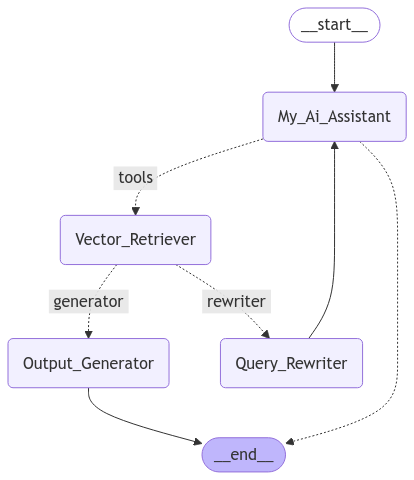

In [45]:
app

In [46]:
app.invoke({"messages":["What is a Autonomous Agent?"]})

---CALL AGENT---
---DECISION: DOCS RELEVANT---
---GENERATE---
this is my response:content='An Autonomous Agent is a system where a large language model (LLM) acts as the "brain".  It\'s designed to solve problems and accomplish tasks independently, using the LLM\'s capabilities for understanding and generating text.  Examples of this concept include AutoGPT, GPT-Engineer, and BabyAGI. \n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 68, 'prompt_tokens': 338, 'total_tokens': 406, 'completion_time': 0.123636364, 'prompt_time': 0.010538997, 'queue_time': 0.020827553, 'total_time': 0.134175361}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-6266d850-d95e-432c-a696-7272a0517d2a-0' usage_metadata={'input_tokens': 338, 'output_tokens': 68, 'total_tokens': 406}


{'messages': [HumanMessage(content='What is a Autonomous Agent?', additional_kwargs={}, response_metadata={}, id='82fbddd9-9703-4a45-8756-acae551f0681'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_gyxv', 'function': {'arguments': '{"query":"Autonomous Agent"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 1039, 'total_tokens': 1124, 'completion_time': 0.154545455, 'prompt_time': 0.042235117, 'queue_time': 0.020625998999999992, 'total_time': 0.196780572}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-8c3b8b3f-b4e4-4ec1-80d6-84ac14f87ceb-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'Autonomous Agent'}, 'id': 'call_gyxv', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1039, 'output_tokens': 85, 'total_tokens': 1124}),
  ToolMessage(content='Search\n\n\n\n\nTags\n\n\n\

In [47]:
app.invoke({"messages":["what is a prompt engineering explain me in terms of agents and langchain?"]})

---CALL AGENT---
---DECISION: DOCS RELEVANT---
---GENERATE---
this is my response:content="In LangChain, prompt engineering involves crafting specific instructions for LLMs to guide their behavior and achieve desired outcomes within applications.  Think of it as giving clear directions to an agent built with an LLM core, allowing it to understand its role and execute tasks effectively.  By carefully designing prompts, you can leverage the LLM's capabilities for various purposes, such as planning, reacting, and interacting with its environment.  \n" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 381, 'total_tokens': 469, 'completion_time': 0.16, 'prompt_time': 0.015418737, 'queue_time': 0.022932672, 'total_time': 0.175418737}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-6ed3964a-a768-4ba1-8dbb-745c47169c78-0' usage_metadata={'input_tokens': 381, 'output_tokens':

{'messages': [HumanMessage(content='what is a prompt engineering explain me in terms of agents and langchain?', additional_kwargs={}, response_metadata={}, id='414a7da9-3090-4ea4-9715-11f20f4edd2f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jhn0', 'function': {'arguments': '{"query":"explain prompt engineering in terms of agents and langchain"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 1048, 'total_tokens': 1141, 'completion_time': 0.169090909, 'prompt_time': 0.033183274, 'queue_time': 0.022768285, 'total_time': 0.202274183}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d5ff48bc-cb2f-437a-8b24-213a013b9716-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'explain prompt engineering in terms of agents and langchain'}, 'id': 'call_jhn0', 'type': 'tool_call'}], usage_meta

In [48]:
app.invoke({"messages":["what is capital of india?"]})

---CALL AGENT---
---DECISION: DOCS NOT RELEVANT---
---TRANSFORM QUERY---
---CALL AGENT---


{'messages': [HumanMessage(content='what is capital of india?', additional_kwargs={}, response_metadata={}, id='09216bc3-9154-4315-8069-fc41230e2ede'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zvcn', 'function': {'arguments': '{"query":"What is the capital of India?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 1039, 'total_tokens': 1128, 'completion_time': 0.161818182, 'prompt_time': 0.032903566, 'queue_time': 0.022241374, 'total_time': 0.194721748}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-a7ae6332-3da0-491a-8455-24f7f1326570-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'What is the capital of India?'}, 'id': 'call_zvcn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1039, 'output_tokens': 89, 'total_tokens': 1128}),
  ToolMessage(content='Definition: 